In [2]:
import os,shutil

In [3]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

F:\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = "C:/Users/Muhammad Ansar/Downloads/archive/Pepsico RnD Potato Lab Dataset/Train"
validation_dir = "C:/Users/Muhammad Ansar/Downloads/archive/Pepsico RnD Potato Lab Dataset/Test"
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 769 images belonging to 2 classes.
Found 192 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

In [8]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [59]:
train_dir = "C:/Users/Muhammad Ansar/Downloads/archive/Pepsico RnD Potato Lab Dataset/Train/Defective"
import matplotlib.pyplot as plt
from keras.preprocessing import image
fnames = [os.path.join(train_dir, fname) for
fname in os.listdir(train_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))


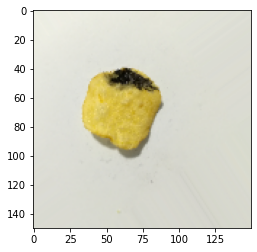

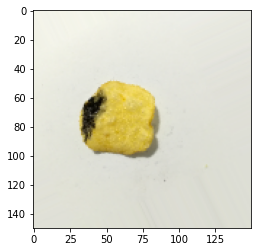

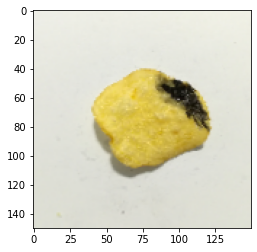

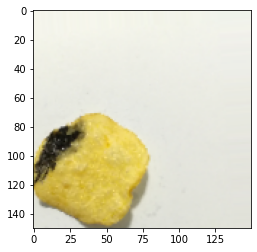

In [60]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [16]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

train_dir = "C:/Users/Muhammad Ansar/Downloads/archive/Pepsico RnD Potato Lab Dataset/Train"
validation_dir = "C:/Users/Muhammad Ansar/Downloads/archive/Pepsico RnD Potato Lab Dataset/Test"

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=10,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=10,
class_mode='binary')

Found 769 images belonging to 2 classes.
Found 192 images belonging to 2 classes.


In [17]:
history = model.fit(
train_generator,
steps_per_epoch=20,
epochs=10,
validation_data=validation_generator)

Epoch 1/10
20/20 [==============================] - 108s 5s/step - loss: 0.7020 - acc: 0.4502 - val_loss: 0.6962 - val_acc: 0.5208
Epoch 2/10
20/20 [==============================] - 108s 6s/step - loss: 0.6955 - acc: 0.5346 - val_loss: 0.6912 - val_acc: 0.4844
Epoch 3/10
20/20 [==============================] - 106s 5s/step - loss: 0.6965 - acc: 0.4665 - val_loss: 0.6901 - val_acc: 0.6615
Epoch 4/10
20/20 [==============================] - 101s 5s/step - loss: 0.6943 - acc: 0.4921 - val_loss: 0.6861 - val_acc: 0.7865
Epoch 5/10
20/20 [==============================] - 105s 5s/step - loss: 0.6917 - acc: 0.5576 - val_loss: 0.6889 - val_acc: 0.5208
Epoch 6/10
20/20 [==============================] - 106s 5s/step - loss: 0.6775 - acc: 0.5771 - val_loss: 0.6823 - val_acc: 0.5208
Epoch 7/10
20/20 [==============================] - 109s 5s/step - loss: 0.6666 - acc: 0.6122 - val_loss: 0.6773 - val_acc: 0.4792
Epoch 8/10
20/20 [==============================] - 104s 5s/step - loss: 0.6759 - a

In [21]:
model.save('Pepsico patato chips quality predictor.h5')

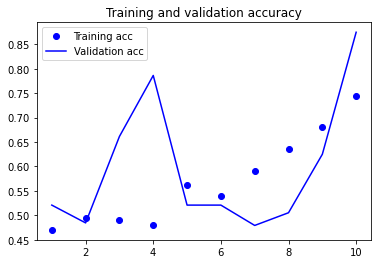

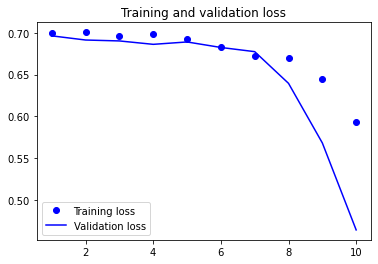

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [142]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
import tensorflow.keras 

In [170]:
myimage = load_img('a.jpg',target_size = (150,150))

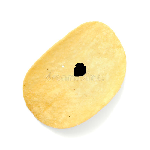

In [171]:
myimage

In [172]:
myimage = img_to_array(myimage)
myimage = myimage.reshape(1,150,150,3)
result = model.predict(myimage)
print(result)

[[0.]]


In [114]:
#mylabel = decode_predictions(result)